---
title: "Fine-tuning keras models"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-04-04"
categories: [python, datacamp, machine learning, deep learning, keras]
image: "fineTuningKerasModel.png"

---

# Fine-tuning keras models

There will be a discussion on some basic NLP concepts, such as word tokenization and regular expressions for parsing text. We will also cover how to handle non-English texts, as well as more difficult tokenization problems.

This **Fine-tuning keras models** is part of [Datacamp course: Introduction to Deep Learning in Python] In a wide range of fields such as robotics, natural language processing, image recognition, and artificial intelligence, including AlphaGo, deep learning is the technique behind the most exciting capabilities. As part of this course, you will gain hands-on, practical experience using deep learning with Keras 2.0, the latest version of a cutting-edge Python library for deep learning.

This is my learning experience of data science through DataCamp. These repository contributions are part of my learning journey through my graduate program masters of applied data sciences (MADS) at University Of Michigan, [DeepLearning.AI], [Coursera] & [DataCamp]. You can find my similar articles & more stories at my [medium] & [LinkedIn] profile. I am available at [kaggle] & [github blogs] & [github repos]. Thank you for your motivation, support & valuable feedback.

These include projects, coursework & notebook which I learned through my data science journey. They are created for reproducible & future reference purpose only. All source code, slides or screenshot are intellactual property of respective content authors. If you find these contents beneficial, kindly consider learning subscription from [DeepLearning.AI Subscription], [Coursera], [DataCamp]



[DeepLearning.AI]: https://www.deeplearning.ai
[DeepLearning.AI Subscription]: https://www.deeplearning.ai
[Coursera]: https://www.coursera.org
[DataCamp]: https://www.datacamp.com
[medium]: https://medium.com/@kamig4u
[LinkedIn]: https://www.linkedin.com/in/asadenterprisearchitect
[kaggle]: https://www.kaggle.com/kakamana
[github blogs]: https://kakamana.github.io
[github repos]: https://github.com/kakamana
[Datacamp course: Introduction to Natural Language Processing in Python]: (https://app.datacamp.com/learn/courses/introduction-to-deep-learning-in-python)

In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

# Understanding model optimization

* The challenges of optimization
    * Optimize 1000s of parameters simultaneously with complex relationships
    * Model improvements may not be meaningful as a result of updates
    * Too small of an update (if learning rate is low) or too large of an update (if learning rate is high)

* Gradients that are disappearing
    * A condition that occurs when many layers have very small slopes (e.g., because they are on the flat part of the Tanh curve).
    * Backprop updates were close to zero in deep networks

## Changing optimization parameters

Now is the time to get your hands dirty with optimization. As a next step, you will optimize a model with a very low learning rate, a very high learning rate, and a "just right" learning rate. Upon completing this exercise, you should review the results, keeping in mind that a low loss function is desirable.

In [15]:
df = pd.read_csv('dataset/titanic_all_numeric.csv')
df.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


In [16]:
from tensorflow.keras.utils import to_categorical

predictors = df.iloc[:, 1:].astype(np.float32).to_numpy()
target = to_categorical(df.iloc[:, 0].astype(np.float32).to_numpy())

In [17]:
input_shape = (10, )

def get_new_model(input_shape = input_shape):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(100, activation='relu', input_shape = input_shape))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(2, activation='softmax'))
    return model

In [18]:
lr_to_test = [0.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n' % lr)

    # Build new model to test, unaffected by previous models
    model = get_new_model()

    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = tf.keras.optimizers.SGD(lr=lr)

    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')

    # Fit the model
    model.fit(predictors, target, epochs=10)



Testing model with learning rate: 0.000001

Epoch 1/10
28/28 [==============================] - 0s 7ms/step - loss: 1.7475
Epoch 2/10
28/28 [==============================] - 0s 6ms/step - loss: 0.6611
Epoch 3/10
28/28 [==============================] - 0s 7ms/step - loss: 0.6218
Epoch 4/10
28/28 [==============================] - 0s 6ms/step - loss: 0.6160
Epoch 5/10
28/28 [==============================] - 0s 6ms/step - loss: 0.6219
Epoch 6/10
28/28 [==============================] - 0s 6ms/step - loss: 0.6221
Epoch 7/10
28/28 [==============================] - 0s 6ms/step - loss: 0.5972
Epoch 8/10
28/28 [==============================] - 0s 6ms/step - loss: 0.6122
Epoch 9/10
28/28 [==============================] - 0s 6ms/step - loss: 0.5872
Epoch 10/10
28/28 [==============================] - 0s 6ms/step - loss: 0.6101




Testing model with learning rate: 0.010000

Epoch 1/10
28/28 [==============================] - 0s 7ms/step - loss: 1.3687
Epoch 2/10
28/28 [==============================] - 0s 6ms/step - loss: 0.6640
Epoch 3/10
28/28 [==============================] - 0s 6ms/step - loss: 0.6407
Epoch 4/10
28/28 [==============================] - 0s 6ms/step - loss: 0.6024
Epoch 5/10
28/28 [==============================] - 0s 6ms/step - loss: 0.5949
Epoch 6/10
28/28 [==============================] - 0s 6ms/step - loss: 0.5895
Epoch 7/10
28/28 [==============================] - 0s 6ms/step - loss: 0.5998
Epoch 8/10
28/28 [==============================] - 0s 6ms/step - loss: 0.5966
Epoch 9/10
28/28 [==============================] - 0s 6ms/step - loss: 0.5847
Epoch 10/10
28/28 [==============================] - 0s 6ms/step - loss: 0.5800




Testing model with learning rate: 1.000000

Epoch 1/10
28/28 [==============================] - 1s 7ms/step - loss: 1.8756
Epoch 2/10
28/28 [==============================] - 0s 6ms/step - loss: 0.6488
Epoch 3/10
28/28 [==============================] - 0s 6ms/step - loss: 0.6314
Epoch 4/10
28/28 [==============================] - 0s 7ms/step - loss: 0.6189
Epoch 5/10
28/28 [==============================] - 0s 6ms/step - loss: 0.6079
Epoch 6/10
28/28 [==============================] - 0s 6ms/step - loss: 0.6083
Epoch 7/10
28/28 [==============================] - 0s 6ms/step - loss: 0.6033
Epoch 8/10
28/28 [==============================] - 0s 6ms/step - loss: 0.6032
Epoch 9/10
28/28 [==============================] - 0s 6ms/step - loss: 0.5889
Epoch 10/10
28/28 [==============================] - 0s 6ms/step - loss: 0.5899


# Model validation

* Validation in deep learning
    * Commonly use validation split rather than cross-validation
    * Deep learning widely used on large datasets
    * Single validation score is based on large amount of data, and is reliable
* Experimentation
    * Experiment with different architectures
        * More layers
        * Fewer layers
        * Layers with more nodes
        * Layers with fewer nodes
        * Creating a great model requires experimentation

## Evaluating model accuracy on validation dataset
Now it's your turn to monitor model accuracy with a validation data set. A model definition has been provided as model. Your job is to add the code to compile it and then fit it. You'll check the validation score in each epoch.

In [19]:
n_cols = predictors.shape[1]
input_shape = (n_cols, )

# Specify the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, epochs=10, validation_split=0.3)

Epoch 1/10
20/20 [==============================] - 1s 18ms/step - loss: 0.8775 - accuracy: 0.6324 - val_loss: 0.6027 - val_accuracy: 0.6866
Epoch 2/10
20/20 [==============================] - 0s 11ms/step - loss: 0.7324 - accuracy: 0.6501 - val_loss: 0.5652 - val_accuracy: 0.7276
Epoch 3/10
20/20 [==============================] - 0s 11ms/step - loss: 0.6614 - accuracy: 0.6453 - val_loss: 0.5577 - val_accuracy: 0.7463
Epoch 4/10
20/20 [==============================] - 0s 11ms/step - loss: 0.6296 - accuracy: 0.6709 - val_loss: 0.5096 - val_accuracy: 0.7500
Epoch 5/10
20/20 [==============================] - 0s 11ms/step - loss: 0.6118 - accuracy: 0.6774 - val_loss: 0.4926 - val_accuracy: 0.7537
Epoch 6/10
20/20 [==============================] - 0s 11ms/step - loss: 0.5969 - accuracy: 0.6934 - val_loss: 0.5922 - val_accuracy: 0.7500
Epoch 7/10
20/20 [==============================] - 0s 11ms/step - loss: 0.6406 - accuracy: 0.6918 - val_loss: 0.5396 - val_accuracy: 0.7201
Epoch 8/10
20

## Early stopping: Optimizing the optimization
Now that you know how to monitor your model performance throughout optimization, you can use early stopping to stop optimization when it isn't helping any more. Since the optimization stops automatically when it isn't helping, you can also set a high value for epochs in your call to .fit().

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols, )

# Specify the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors, target, epochs=30, validation_split=0.3,
          callbacks=[early_stopping_monitor])

print("\nBecause optimization will automatically stop when it is no longer helpful, it is okay to specify the maximum number of epochs as 30 rather than using the default of 10 that you've used so far. Here, it seems like the optimization stopped after 4 epochs.")

Epoch 1/30
20/20 [==============================] - 1s 17ms/step - loss: 0.7307 - accuracy: 0.6132 - val_loss: 0.6820 - val_accuracy: 0.6940
Epoch 2/30
20/20 [==============================] - 0s 11ms/step - loss: 0.6902 - accuracy: 0.6404 - val_loss: 0.5921 - val_accuracy: 0.7239
Epoch 3/30
20/20 [==============================] - 0s 11ms/step - loss: 0.6624 - accuracy: 0.6677 - val_loss: 0.5234 - val_accuracy: 0.7351
Epoch 4/30
20/20 [==============================] - 0s 11ms/step - loss: 0.6245 - accuracy: 0.6950 - val_loss: 0.5368 - val_accuracy: 0.7313
Epoch 5/30
20/20 [==============================] - 0s 11ms/step - loss: 0.6476 - accuracy: 0.6758 - val_loss: 0.5154 - val_accuracy: 0.7612
Epoch 6/30
20/20 [==============================] - 0s 11ms/step - loss: 0.6226 - accuracy: 0.6774 - val_loss: 0.5410 - val_accuracy: 0.7724
Epoch 7/30
20/20 [==============================] - 0s 11ms/step - loss: 0.6440 - accuracy: 0.6950 - val_loss: 0.6073 - val_accuracy: 0.6903

Because opti

## Experimenting with wider networks

You now have all the information you need to begin experimenting with different models.

Pre-loaded is a model named model_1. It is a relatively small network, with only ten units in each hidden layer.

As part of this exercise, you will create a new model called model_2 which is similar to model_1, except that it has 100 units in each hidden layer.

As soon as model_2 is created, both models will be fitted, and a graph will be displayed showing each model's loss score at each epoch. We have added the argument verbose=False to the fitting commands in order to print out fewer updates since they will be displayed graphically rather than as text.

After you hit run, the outputs will take a moment to appear because you are fitting two models.

In [21]:
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(10, activation='relu', input_shape=input_shape))
model_1.add(tf.keras.layers.Dense(10, activation='relu'))
model_1.add(tf.keras.layers.Dense(2, activation='softmax'))
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model_1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 10)                110       
                                                                 
 dense_46 (Dense)            (None, 10)                110       
                                                                 
 dense_47 (Dense)            (None, 2)                 22        
                                                                 
Total params: 242
Trainable params: 242
Non-trainable params: 0
_________________________________________________________________



The blue model is the one you made, the red is the original model. Your model had a lower loss value, so it is the better model


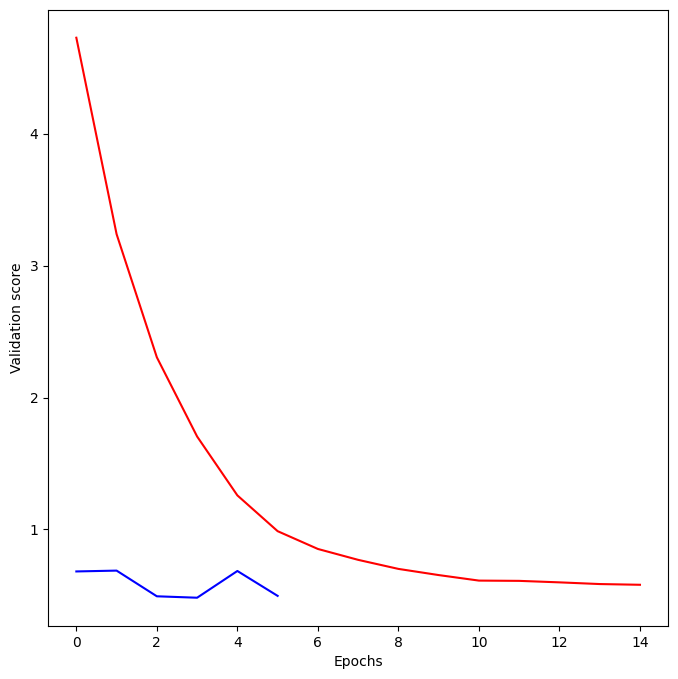

In [23]:
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = tf.keras.Sequential()

# Add the first and second layers
model_2.add(tf.keras.layers.Dense(100, activation='relu', input_shape=input_shape))
model_2.add(tf.keras.layers.Dense(100, activation='relu'))

# Add the output layer
model_2.add(tf.keras.layers.Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2,
                               callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2,
                               callbacks=[early_stopping_monitor], verbose=False)

# Create th eplot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b');
plt.xlabel('Epochs')
plt.ylabel('Validation score');
print("\nThe blue model is the one you made, the red is the original model. Your model had a lower loss value, so it is the better model")

## Adding layers to a network
You've seen how to experiment with wider networks. In this exercise, you'll try a deeper network (more hidden layers).

Once again, you have a baseline model called model_1 as a starting point. It has 1 hidden layer, with 50 units. You can see a summary of that model's structure printed out. You will create a similar network with 3 hidden layers (still keeping 50 units in each layer).

This will again take a moment to fit both models, so you'll need to wait a few seconds to see the results after you run your code.

In [24]:
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(50, activation='relu', input_shape=input_shape))
model_1.add(tf.keras.layers.Dense(2, activation='softmax'))
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model_1.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 50)                550       
                                                                 
 dense_52 (Dense)            (None, 2)                 102       
                                                                 
Total params: 652
Trainable params: 652
Non-trainable params: 0
_________________________________________________________________



The blue model is the one you made and the red is the original model. The model with the lower loss value is the better model


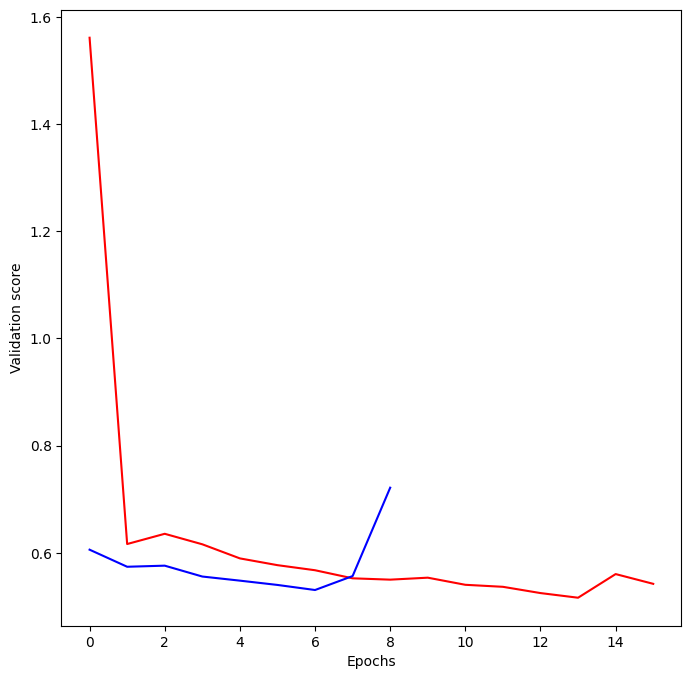

In [26]:
model_2 = tf.keras.Sequential()

# Add the first, second, and third hidden layers
model_2.add(tf.keras.layers.Dense(50, activation='relu', input_shape=input_shape))
model_2.add(tf.keras.layers.Dense(50, activation='relu'))
model_2.add(tf.keras.layers.Dense(50, activation='relu'))

# Add the output layer
model_2.add(tf.keras.layers.Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b');
plt.xlabel('Epochs');
plt.ylabel('Validation score');
print("\nThe blue model is the one you made and the red is the original model. The model with the lower loss value is the better model")

# Thinking about model capacity

* Overfitting
![](fineTuning-1.png)
* Workflow for optimizing model capacity
    * Start with a small network
    * Gradually increase capacity
    * Keep increasing capacity until validation score is no longer improving

# Stepping up to images

## Building your own digit recognition model
You've reached the final exercise of the course - you now know everything you need to build an accurate model to recognize handwritten digits!

To add an extra challenge, we've loaded only 2500 images, rather than 60000 which you will see in some published results. Deep learning models perform better with more data, however, they also take longer to train, especially when they start becoming more complex.

If you have a computer with a CUDA compatible GPU, you can take advantage of it to improve computation time. If you don't have a GPU, no problem! You can set up a deep learning environment in the cloud that can run your models on a GPU. Here is a [blog post] by Dan that explains how to do this - check it out after completing this exercise! It is a great next step as you continue your deep learning journey.

[blog post]: https://www.datacamp.com/community/tutorials/deep-learning-jupyter-aws

In [27]:
mnist = pd.read_csv('dataset/mnist.csv', header=None)
mnist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.61,0.611,0.612,0.613,0.614,0.615,0.616,0.617
1,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [28]:
X = mnist.iloc[:, 1:].astype(np.float32).to_numpy()
y = to_categorical(mnist.iloc[:, 0])

In [29]:
model = tf.keras.Sequential()

# Add the first hidden layer
model.add(tf.keras.layers.Dense(50, activation='relu', input_shape=(X.shape[1], )))

# Add the second hidden layer
model.add(tf.keras.layers.Dense(50, activation='relu'))

# Add the output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X, y, validation_split=0.3, epochs=50);

Epoch 1/50
44/44 [==============================] - 1s 16ms/step - loss: 24.8658 - accuracy: 0.4379 - val_loss: 8.2308 - val_accuracy: 0.6106
Epoch 2/50
44/44 [==============================] - 1s 12ms/step - loss: 4.4352 - accuracy: 0.7250 - val_loss: 5.0027 - val_accuracy: 0.7088
Epoch 3/50
44/44 [==============================] - 0s 11ms/step - loss: 2.2376 - accuracy: 0.8264 - val_loss: 4.1121 - val_accuracy: 0.7354
Epoch 4/50
44/44 [==============================] - 0s 11ms/step - loss: 1.2230 - accuracy: 0.8843 - val_loss: 4.0306 - val_accuracy: 0.7255
Epoch 5/50
44/44 [==============================] - 0s 11ms/step - loss: 0.7398 - accuracy: 0.8993 - val_loss: 3.6222 - val_accuracy: 0.7454
Epoch 6/50
44/44 [==============================] - 0s 11ms/step - loss: 0.4634 - accuracy: 0.9207 - val_loss: 3.5127 - val_accuracy: 0.7421
Epoch 7/50
44/44 [==============================] - 1s 12ms/step - loss: 0.2833 - accuracy: 0.9471 - val_loss: 3.5105 - val_accuracy: 0.7504
Epoch 8/50
4

In [30]:
print("\nYou've done something pretty amazing. The code you wrote leads to a model that's 90% accurate at recognizing handwritten digits, even while using a small training set of only 1750 images!")


You've done something pretty amazing. The code you wrote leads to a model that's 90% accurate at recognizing handwritten digits, even while using a small training set of only 1750 images!
